In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import imghdr
import ntpath

import os
import matplotlib.pyplot as plt

import PIL
import PIL.Image


#import relevant  packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split




!git clone https://github.com/Yeli2905/ISY503_Assessment3.git

fatal: destination path 'ISY503_Assessment3' already exists and is not an empty directory.


<BarContainer object of 25 artists>

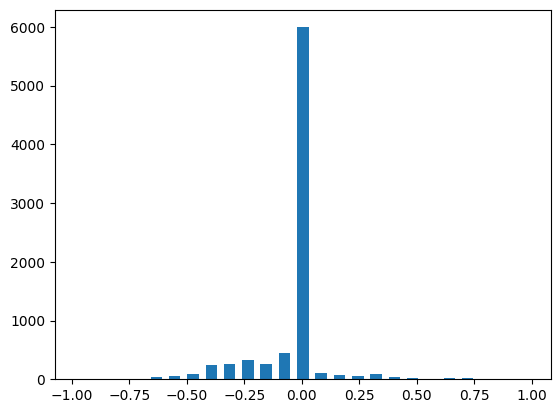

In [5]:

#Loading hte image from the folder
data_dir = ('/content/sample_data/ISY503_Assessment3/data/IMG')

# create the headers of the columns
column_name = ['center','left','right','steering','throttle','brake','speed']
#loading the class label from the driving_log
dataset_car = pd.read_csv(os.path.join(data_dir, '/content/sample_data/ISY503_Assessment3/data/driving_log.csv'), names=column_name)


# Passing all the imagens to a new variable.
img = os.listdir(os.path.join(data_dir))
# print(img[0])



# Creating a function that will delite the unecessary extensive path of the drive file
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

dataset_car['center'] = dataset_car['center'].apply(path_leaf)
dataset_car['left'] = dataset_car['left'].apply(path_leaf)
dataset_car['right'] = dataset_car['right'].apply(path_leaf)
dataset_car.head()


# Ploting hte angle of the traing foward road
num_bins = 25
sample_per_bin = 400
hist, bins = np.histogram(dataset_car['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
# plt.plot((np.min(dataset_car['steering']), np.max(dataset_car['steering']), (sample_per_bin, sample_per_bin)))




In [6]:
count = 1


img_path_list = []
steering_data = []

for i in range(len(dataset_car)):
  index_car = dataset_car.iloc[i]
  c ,l ,r = index_car[0], index_car[1], index_car[2]
  img_path_list.append(os.path.join(data_dir, c.strip()))
  steering_data.append(float(index_car[3]))
  img_path_list.append(os.path.join(data_dir, l.strip()))
  steering_data.append(float(index_car[3])+0.15)
  img_path_list.append(os.path.join(data_dir, r.strip()))
  steering_data.append(float(index_car[3])-0.15)

# Convert lists to NumPy arrays outside the loop
img_path_lists = np.asarray(img_path_list)
steering_datas = np.asarray(steering_data)


<ipython-input-6-5aa33961bd8a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c ,l ,r = index_car[0], index_car[1], index_car[2]
<ipython-input-6-5aa33961bd8a>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering_data.append(float(index_car[3]))
<ipython-input-6-5aa33961bd8a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering_data.append(float(index_car[3])+0.15)
<ipython-input-6-5aa33961bd8a>:15: FutureWarning: Seri

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(img_path_lists, steering_datas, test_size=0.2, random_state=6)


In [ ]:
# checking the elements on the folder IMG
print(img_path_lists)

['/content/sample_data/ISY503_Assessment3/data/IMG/center_2024_11_20_20_10_54_752.jpg'
 '/content/sample_data/ISY503_Assessment3/data/IMG/left_2024_11_20_20_10_54_752.jpg'
 '/content/sample_data/ISY503_Assessment3/data/IMG/right_2024_11_20_20_10_54_752.jpg'
 ...
 '/content/sample_data/ISY503_Assessment3/data/IMG/center_2024_11_20_20_25_09_058.jpg'
 '/content/sample_data/ISY503_Assessment3/data/IMG/left_2024_11_20_20_25_09_058.jpg'
 '/content/sample_data/ISY503_Assessment3/data/IMG/right_2024_11_20_20_25_09_058.jpg']


Text(0.5, 1.0, 'Validation set')

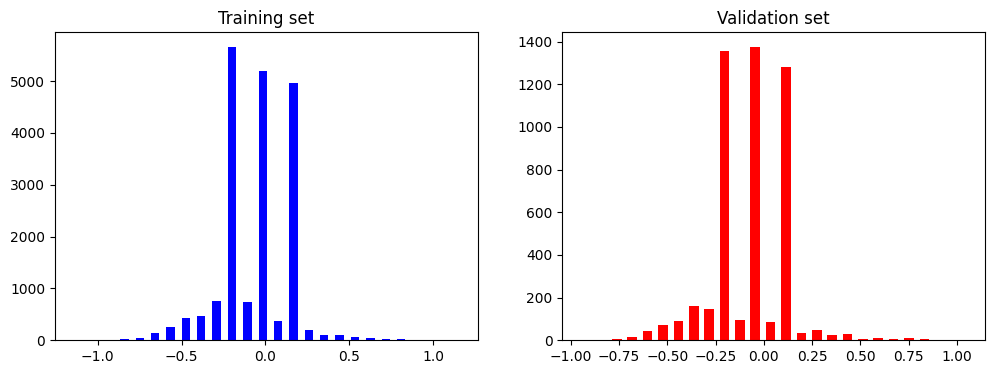

In [ ]:
# plotting the validation and training set to identify similarities on the data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
# define a method to conver the img into RGB (colorful imgs)
def img_processing(img):
  img = img[69:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [ ]:
image_path = img_path_lists[100]
# image = PIL.Image.open(image_path)
# plt.imshow(image)

import matplotlib.image as mpimg # this line needs to be at the beginning of the code
import cv2


original_img = mpimg.imread(image_path)
processed_img = img_processing(original_img)


# Attempt to use a different library for visualize image
# plt.imshow(processed_img)
# Passing a single image to be print
# igg = cv2.imread(os.path.join(data_dir, img[0]))
# print(img[0])
# # obtaining the value of the chape of the image as width and hight
# t ,v, g = igg.shape
# total = t * v
# print(total)
# plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
# Identifying the type of data = the image is an numpyarray
# print(type(igg))


In [ ]:
# define the method model which will create a model using 8 layers.
def cnn_model_car():
  model = tf.keras.Sequential()

  model.add(Conv2D(24, (5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (3,3), activation='elu'))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation='elu'))
  model.add(Dense(1))

  # optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

  return model

# printing the structure of the model and layers
model = cnn_model_car()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 5, 22, 48)           │          43,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 20, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3840)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         384,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,091 (1.85 MB)

 Trainable params: 484,091 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# X_train, X_valid, y_train, y_valid = train_test_split(img_path_lists, steering_datas, test_size=0.2, random_state=6)
import random
# define the batch size usually 32
def batch_generator(img_path_lists, steering_datas, batch_size):
  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(img_path_lists) - 1)

      # Load the image using mpimg.imread before processing
      im = mpimg.imread(img_path_lists[random_index])
      img = img_processing(im)

      batch_img.append(img)
      batch_steering.append(steering_datas[random_index]) # Accessing corresponding steering angle

    yield np.asarray(batch_img), np.asarray(batch_steering)

In [ ]:
# training the model
history = model.fit(batch_generator(X_train, y_train, 100),
                    steps_per_epoch=300,
                    epochs=10,
                    validation_data=batch_generator(X_valid, y_valid, 100),
                    validation_steps=200,
                    verbose=1,
                    shuffle=1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.2342 - loss: 0.3759 - val_accuracy: 0.2419 - val_loss: 0.0243
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.2366 - loss: 0.0228 - val_accuracy: 0.2426 - val_loss: 0.0215
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.2297 - loss: 0.0223 - val_accuracy: 0.2453 - val_loss: 0.0242
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.2299 - loss: 0.0208 - val_accuracy: 0.2445 - val_loss: 0.0202
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.2366 - loss: 0.0198 - val_accuracy: 0.2471 - val_loss: 0.0199
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.2374 - loss: 0.0188 - val_accuracy: 0.2442 - val_loss: 0.0209
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.2365 - loss: 0.0191 - val_accuracy: 0.2420 - val_loss: 0.0184
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.2354 - loss: 0.0189 - val_accu

Text(0.5, 0, 'Epoch')

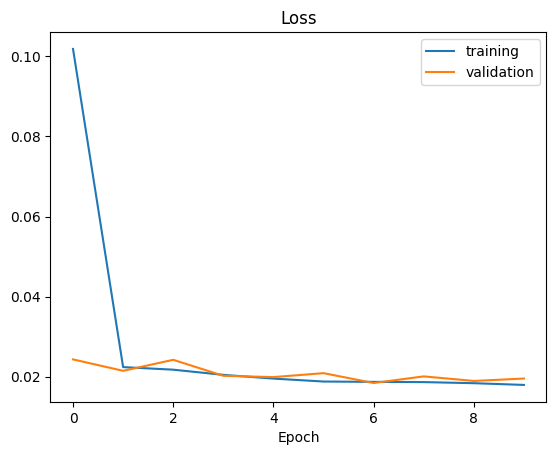

In [ ]:
# check the val-loss and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
from dataclasses import dataclass
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

# define ENUMS for a quick change on the model structure
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 10
    BATCH_SIZE:    int = 100
    LEARNING_RATE: float = 0.001




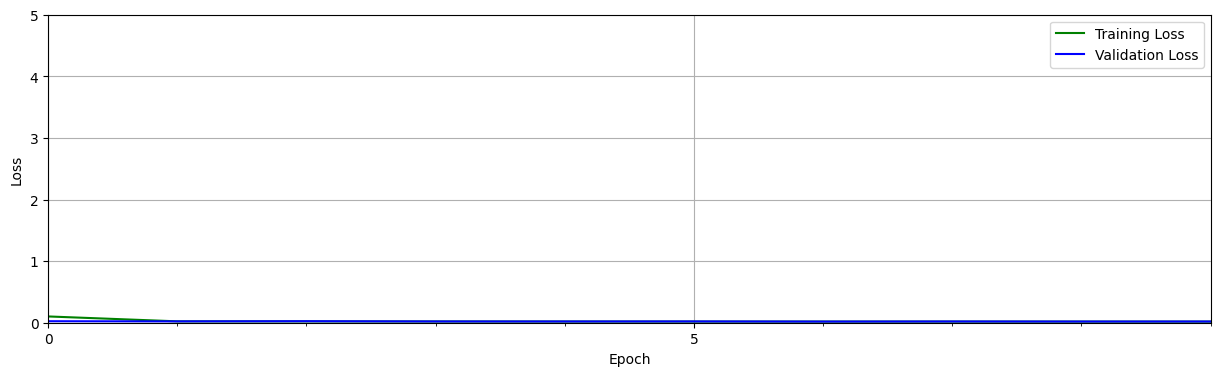

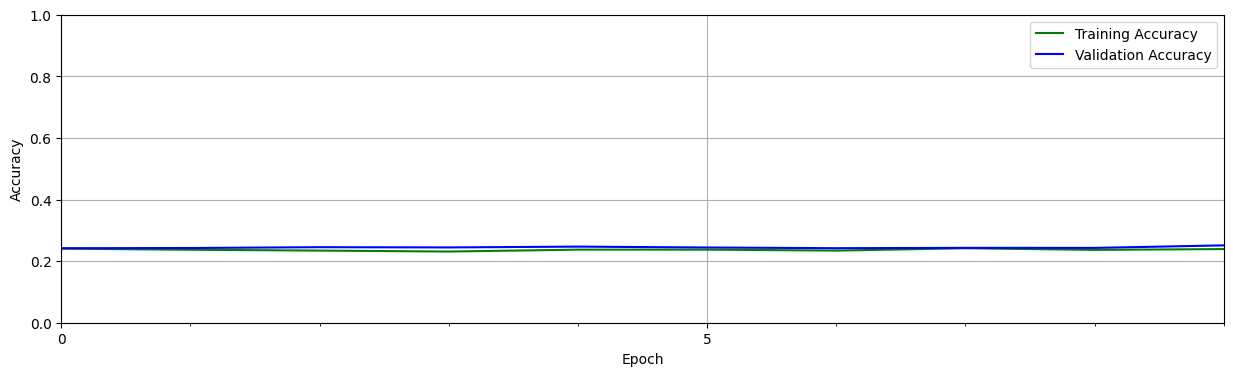

In [37]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()




# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
# saving the model
# model_test.save('model_test')
#save the model
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>